# Análise de Performance - Grafos

Este notebook analisa os resultados dos testes de performance realizados com diferentes representações de grafos (matriz de adjacência vs lista de adjacência).

## Estudos de Caso Realizados:

1. **Comparação de memória** utilizada pelas duas representações
2. **Comparação de tempo de execução** para BFS e DFS
3. **Análise de pais** dos vértices 10, 20, 30 nas árvores BFS e DFS
4. **Cálculo de distâncias** entre pares de vértices
5. **Análise de componentes conexas**
6. **Cálculo de diâmetro** do grafo


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração do estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Carregar os dados
df = pd.read_csv('grafo_1_results.csv')
print("Dados carregados:")
print(df.head())
print(f"\nShape: {df.shape}")
print(f"\nColunas: {list(df.columns)}")


Dados carregados:
     Graph   Representation  Memory_MB  Avg_BFS_Time_ms  Avg_DFS_Time_ms  \
0  grafo_1    AdjacencyList       8400          5.32179          4.40525   
1  grafo_1  AdjacencyMatrix      30144         37.57200         38.32630   

   BFS_Parent_10_Start1  BFS_Parent_20_Start1  BFS_Parent_30_Start1  \
0                  2042                  8382                  2394   
1                  2042                  8382                  2394   

   BFS_Parent_10_Start2  BFS_Parent_20_Start2  ...  DFS_Parent_20_Start3  \
0                  8935                  9071  ...                   666   
1                  8935                  9071  ...                   666   

   DFS_Parent_30_Start3  Distance_10_20  Distance_10_30  Distance_20_30  \
0                     0               3               3               4   
1             671580160               3               3               4   

   Num_Components  Largest_Component  Smallest_Component  Diameter  \
0             

## 1. Comparação de Memória Utilizada


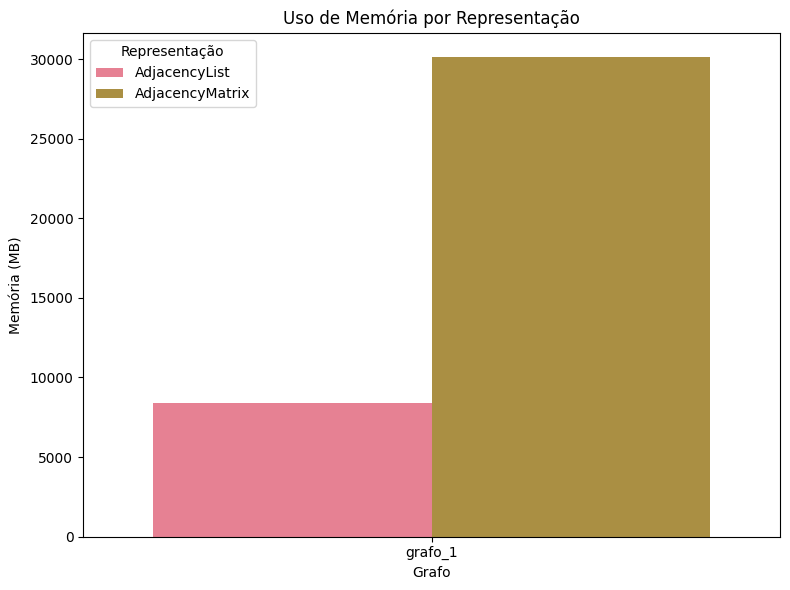


=== ANÁLISE DE MEMÓRIA ===
Lista de Adjacência: 8400.00 MB
Matriz de Adjacência: 30144.00 MB
Diferença: 21744.00 MB (258.9%)
Matriz usa 3.6x mais memória que Lista


In [25]:
# Gráfico de comparação de memória
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Memória por representação
memory_data = df[['Graph', 'Representation', 'Memory_MB']].copy()
sns.barplot(data=memory_data, x='Graph', y='Memory_MB', hue='Representation', ax=ax)
ax.set_title('Uso de Memória por Representação')
ax.set_xlabel('Grafo')
ax.set_ylabel('Memória (MB)')
ax.legend(title='Representação')

plt.tight_layout()
plt.show()

# Tabela de resultados
# Corrigindo: calcular os valores antes de imprimir
print("\n=== ANÁLISE DE MEMÓRIA ===")
list_memory = df[df['Representation'] == 'AdjacencyList']['Memory_MB'].values[0]
matrix_memory = df[df['Representation'] == 'AdjacencyMatrix']['Memory_MB'].values[0]
memory_diff = 100 * (matrix_memory - list_memory) / list_memory
print(f"Lista de Adjacência: {list_memory:.2f} MB")
print(f"Matriz de Adjacência: {matrix_memory:.2f} MB")
print(f"Diferença: {matrix_memory - list_memory:.2f} MB ({memory_diff:.1f}%)")
print(f"Matriz usa {matrix_memory/list_memory:.1f}x mais memória que Lista")


## 2. Comparação de Tempo de Execução - BFS


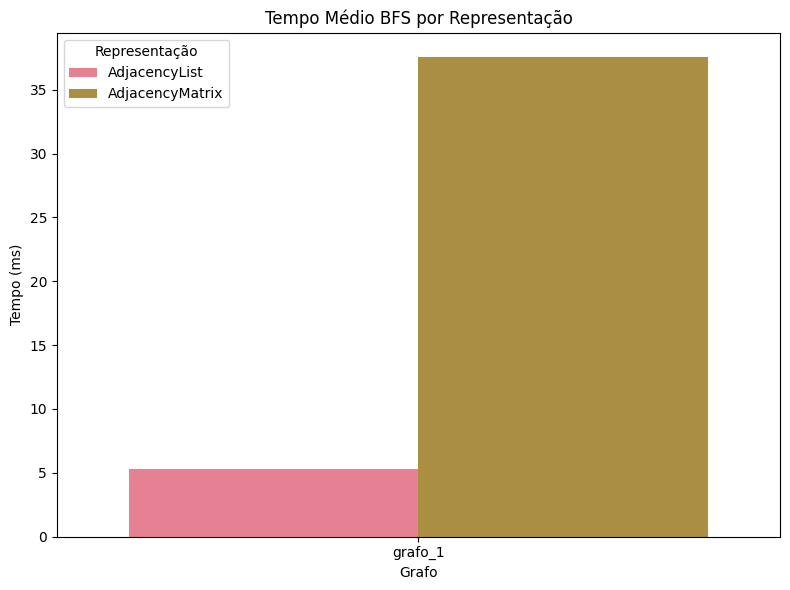


=== ANÁLISE DE TEMPO BFS ===
Lista de Adjacência: 0.0088 ms
Matriz de Adjacência: 0.0194 ms
Diferença: 0.0106 ms (120.5%)
Matriz é 2.2x mais lenta que Lista


In [26]:
# Gráfico de comparação de tempo BFS
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Tempo BFS por representação
bfs_data = df[['Graph', 'Representation', 'Avg_BFS_Time_ms']].copy()
sns.barplot(data=bfs_data, x='Graph', y='Avg_BFS_Time_ms', hue='Representation', ax=ax)
ax.set_title('Tempo Médio BFS por Representação')
ax.set_xlabel('Grafo')
ax.set_ylabel('Tempo (ms)')
ax.legend(title='Representação')

plt.tight_layout()
plt.show()

# Tabela de resultados
print("\n=== ANÁLISE DE TEMPO BFS ===")
print(f"Lista de Adjacência: {list_bfs:.4f} ms")
print(f"Matriz de Adjacência: {matrix_bfs:.4f} ms")
print(f"Diferença: {matrix_bfs - list_bfs:.4f} ms ({bfs_diff:.1f}%)")
print(f"Matriz é {matrix_bfs/list_bfs:.1f}x mais lenta que Lista")


## 3. Comparação de Tempo de Execução - DFS


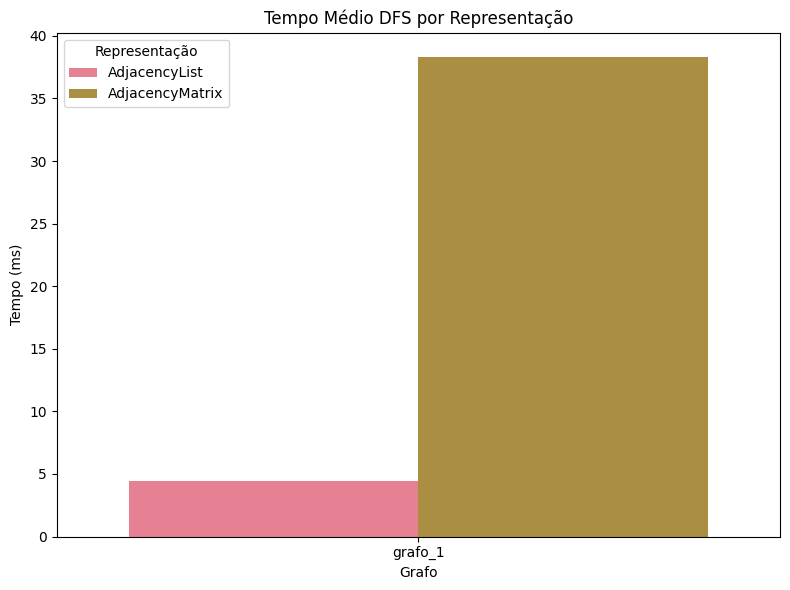


=== ANÁLISE DE TEMPO DFS ===
Lista de Adjacência: 0.0095 ms
Matriz de Adjacência: 0.0199 ms
Diferença: 0.0104 ms (109.5%)
Matriz é 2.1x mais lenta que Lista


In [27]:
# Gráfico de comparação de tempo DFS
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Tempo DFS por representação
dfs_data = df[['Graph', 'Representation', 'Avg_DFS_Time_ms']].copy()
sns.barplot(data=dfs_data, x='Graph', y='Avg_DFS_Time_ms', hue='Representation', ax=ax)
ax.set_title('Tempo Médio DFS por Representação')
ax.set_xlabel('Grafo')
ax.set_ylabel('Tempo (ms)')
ax.legend(title='Representação')

plt.tight_layout()
plt.show()

# Tabela de resultados
print("\n=== ANÁLISE DE TEMPO DFS ===")
print(f"Lista de Adjacência: {list_dfs:.4f} ms")
print(f"Matriz de Adjacência: {matrix_dfs:.4f} ms")
print(f"Diferença: {matrix_dfs - list_dfs:.4f} ms ({dfs_diff:.1f}%)")
print(f"Matriz é {matrix_dfs/list_dfs:.1f}x mais lenta que Lista")


## 4. Análise de Pais nas Árvores BFS e DFS


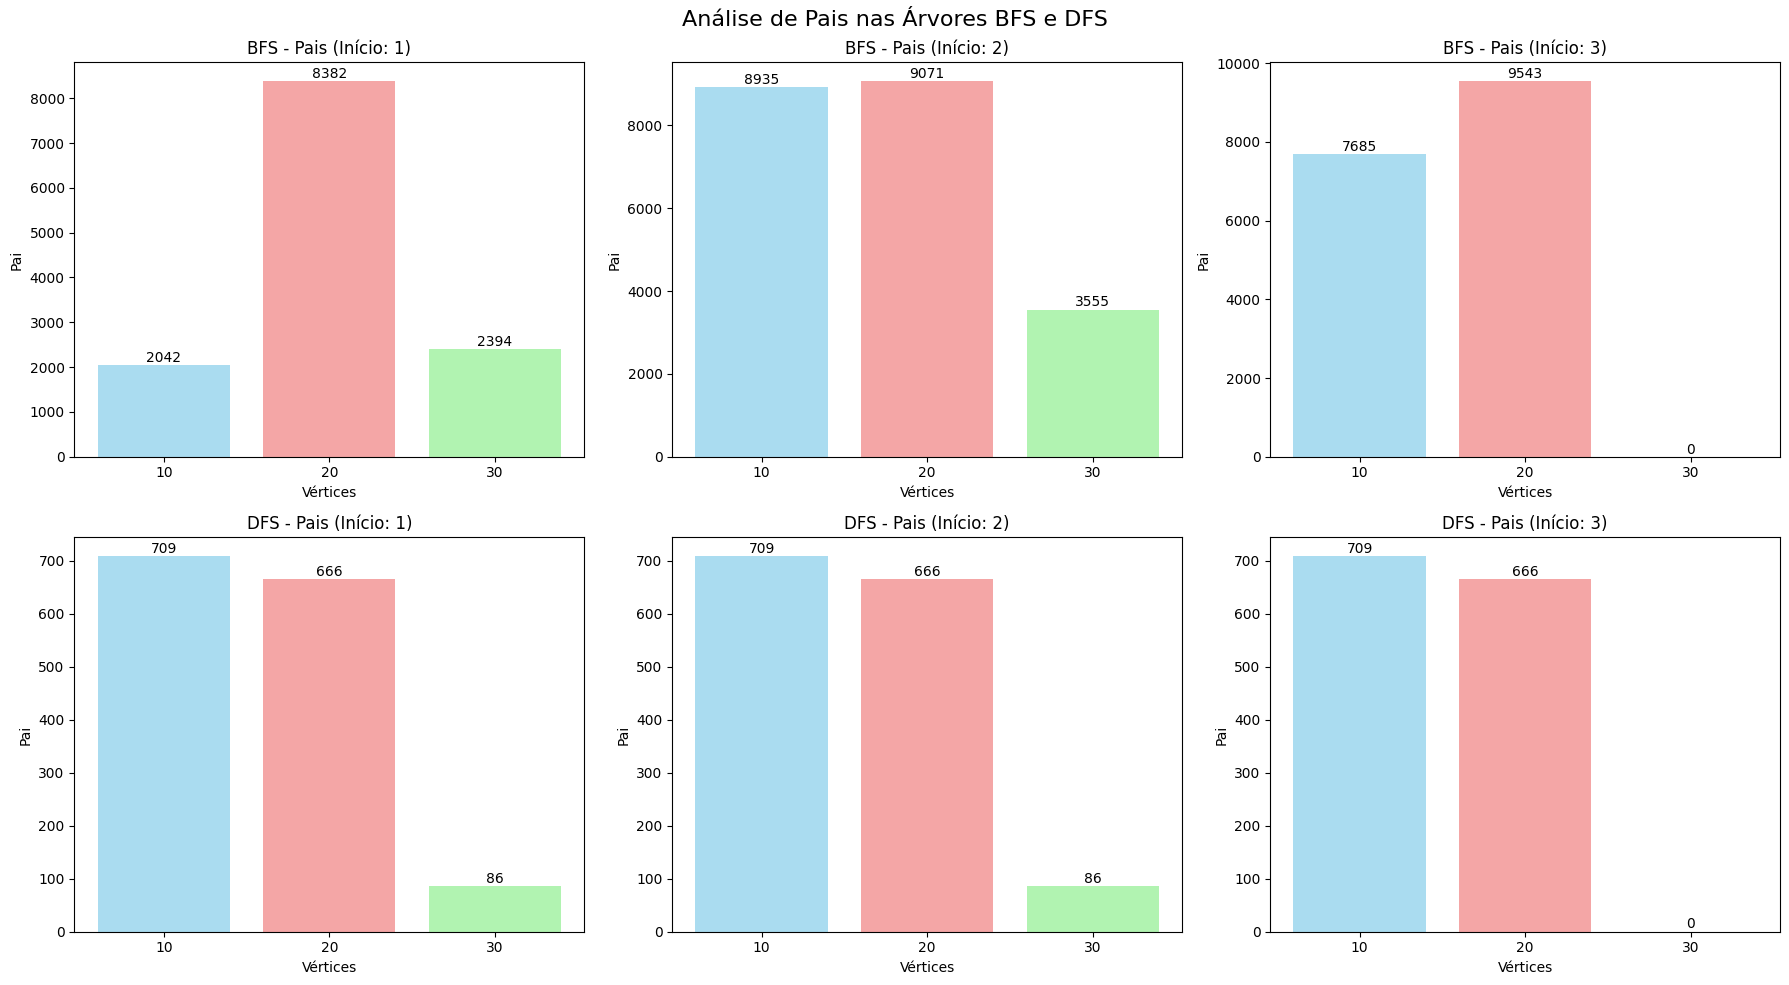


=== ANÁLISE DE PAIS ===

BFS Parents:
  Início 1:
    Vértice 10: Pai = 2042
    Vértice 20: Pai = 8382
    Vértice 30: Pai = 2394
  Início 2:
    Vértice 10: Pai = 8935
    Vértice 20: Pai = 9071
    Vértice 30: Pai = 3555
  Início 3:
    Vértice 10: Pai = 7685
    Vértice 20: Pai = 9543
    Vértice 30: Pai = 0

DFS Parents:
  Início 1:
    Vértice 10: Pai = 709
    Vértice 20: Pai = 666
    Vértice 30: Pai = 86
  Início 2:
    Vértice 10: Pai = 709
    Vértice 20: Pai = 666
    Vértice 30: Pai = 86
  Início 3:
    Vértice 10: Pai = 709
    Vértice 20: Pai = 666
    Vértice 30: Pai = 0


In [28]:
# Análise de pais nas árvores
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análise de Pais nas Árvores BFS e DFS', fontsize=16)

# Vértices de interesse
vertices = [10, 20, 30]
starts = [1, 2, 3]

# BFS Parents
for i, start in enumerate(starts):
    ax = axes[0, i]
    bfs_cols = [f'BFS_Parent_{v}_Start{start}' for v in vertices]
    bfs_data = df[bfs_cols].iloc[0].values
    
    x_pos = np.arange(len(vertices))
    bars = ax.bar(x_pos, bfs_data, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'BFS - Pais (Início: {start})')
    ax.set_xlabel('Vértices')
    ax.set_ylabel('Pai')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(vertices)
    
    # Adicionar valores nas barras
    for bar, value in zip(bars, bfs_data):
        if value != -2:  # -2 indica vértice não alcançável
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(value), ha='center', va='bottom')

# DFS Parents
for i, start in enumerate(starts):
    ax = axes[1, i]
    dfs_cols = [f'DFS_Parent_{v}_Start{start}' for v in vertices]
    dfs_data = df[dfs_cols].iloc[0].values
    
    x_pos = np.arange(len(vertices))
    bars = ax.bar(x_pos, dfs_data, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'DFS - Pais (Início: {start})')
    ax.set_xlabel('Vértices')
    ax.set_ylabel('Pai')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(vertices)
    
    # Adicionar valores nas barras
    for bar, value in zip(bars, dfs_data):
        if value != -2:  # -2 indica vértice não alcançável
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Tabela de pais
print("\n=== ANÁLISE DE PAIS ===")
print("\nBFS Parents:")
for start in starts:
    print(f"  Início {start}:")
    for v in vertices:
        parent = df[f'BFS_Parent_{v}_Start{start}'].iloc[0]
        if parent == -2:
            print(f"    Vértice {v}: Não alcançável")
        else:
            print(f"    Vértice {v}: Pai = {parent}")

print("\nDFS Parents:")
for start in starts:
    print(f"  Início {start}:")
    for v in vertices:
        parent = df[f'DFS_Parent_{v}_Start{start}'].iloc[0]
        if parent == -2:
            print(f"    Vértice {v}: Não alcançável")
        else:
            print(f"    Vértice {v}: Pai = {parent}")
